# Álgebra Linear Algorítmica - 2022.1 - Projeto Final - Professor João Paixão
## Realizado por: David Rodrigues Albuquerque - 120047390

# Apresentação do projeto e objetivo

Este trabalho tem como objetivo apresentar um projeto de segmentação de imagens através de suas cores. 
Serão utilizadas imagens, gráficos e algoritmos para explicar o conteúdo. Caso não tenha experiência com linguagens de programação, a leitura dos códigos é dispensável, podendo atentar-se apenas a saída produzida.

# Segmentação de Imagens

Segmentação de imagem consiste na análise e classificação de imagens em diferentes grupos contido nesta, como objetos, pessoas, animais e cores. Podemos, por exemplo, distinguir diferentes tipos de animais em uma foto, detectar a quantidade de pessoas em um vídeo ou diferenciar cães de gatos em uma gravação. Existem inúmeras aplicações com utilização da segmentação de imagem.

Neste projeto, abordaremos uma implementação de segmentação de imagens por cores. Isto é, dada uma imagem qualquer, faremos a clusterização desta utilizando como dado de entrada suas cores, separando a imagem pelas que forem predominantes. Com isto, podemos reconstruir a imagem usando apenas a cor predominante ou escolher outra cor para pintar a região com uma coloração distinta.

A clusterização da imagem será feita através do algoritmo K-Means, uma algoritmo de aprendizado de máquina sem supervisão, usado para segmentar os dados de entrada escolhidos. Com isto, dado um conjunto $V$ de entrada  ( uma matriz qualquer ) e um valor $K$ qualquer de clusters, o algoritmo segmenta o dado de entrada em $K$ clusters, com cada segmento representando o valor central daquele cluster.

# Imagens

### Como representar imagens computacionalmente

Há inúmeras formas de representar uma imagem computacionalmente. Majoritariamente, imagens são formadas por um grid de *pixels*, isto é, uma matriz $N$ x $N$ qualquer de pixels. Mas afinal, o quê são pixels?

Pixel é o menor elemento que um dispositivo gráfico digital, como monitores, televisões e etc. podem exibir, onde cada pixel será atribuído uma cor. Cada um desses pixels é então disposto em uma matriz que, ao final, quando totalmente preenchida, representará uma imagem qualquer. Este fator é percebido principalmente em imagens com pouca quantidade de pixels, como em artes no estilo *Pixel Art*, onde cada pixel é escolhido e preenchido individualmente.

<img src="./images/pixel-art.jpg" alt="pixel art" width="200" height="200" />

Entendido o quê são pixels, como eles são entendidos pelo computador como dado?
Cada pixel pode ser representado por padrões de cores, como RGB, HSL, HSV, etc. Para este projeto, utilizaremos o padrão RGB (Red, Green, Blue). Estas cores são conhecidas como cores primárias, variando sua intensidade de $0$ até $1$. Por exemplo, um pixel com valor Red $1.0$, Green $0.0$ e Blue $0.0$ resultará na cor vermelha. Estas três cores primárias são escolhidas pois, a partir delas, conseguimos formar todo o espectro de cores visíveis através de suas combinações. Esse padrão é utilizando na maioria dos dispositivos e software gráficos.

<img src="./images/rgb-paint.png" alt="rgb paint" width="200" height="200" />

Com isto, para nosso computador, se quisermos representar apenas um único pixel, devemos entrar com um conjunto de 3 valores: o RGB. Caso queiramos representar uma imagem, basta fornecer como entrada uma matriz $N$ qualquer, onde cada campo da matriz é um conjunto de $3$ elementos representando os valores do RGB.

# Julia

### A linguagem

Para implementação do projeto, será utilizada a linguagem de programação Julia. A linguagem foi escolhida por ser intuitiva aprender e ser excelente para problemas de data science, machine learning, álgebra linear e métodos numéricos. Além disso, possui uma performance excelente nesses casos comparada linguagens que trabalham com problemas similares, como Python e R. Para mais informações, serão deixadas referências na bibliografia.

### O Algoritmo K-Means

Como explicado anteriormente, utilizaremos o algoritmo de clusterização K-Means, um algoritmo de aprendizado de máquina sem supervisão, usado para segmentar os dados de entrada escolhidos. Com isto, dado uma matriz $V$ de entrada e um valor $K$ qualquer de clusters, retorna os segmentos da matriz $V$. O algoritmo funciona utilizando a ideia de *centroids*, da seguinte forma:

1. Iniciamos $K$ *centroids* aleatoriamente.
2. Calculamos todas as distâncias dos pontos de $V$ até cada *centroid*.
3. Associamos cada ponto à um cluster, baseado na menor distância do ponto há algum dos *centroids*.
4. Calculá-se o Erro ao Quadrado dentro de cada cluster.
5. Recalculá-se os $K$ *centroids* usando a média dos pontos associados.
6. Repete-se o passo 3 ao passo 5 um número *máximo* de vezes (enviado como entrada) ou até acha convergência dos valores calculados.

<img src="./images/kmeans.gif" alt="rgb paint" width="200" height="200" />

Com isto, utilizaremos o algoritmo K-Means para separar os pixels da imagem baseado em sua distribuição RGB. Será utilizada a implementação do K-Means da biblioteca Clustering do Julia.



# Implementação

Faremos, inicialmente, a importação de todas as biblioteca utlizadas.

In [29]:
using LinearAlgebra
using Images, ImageIO
using Colors
using Plots
using Statistics
using Clustering

Para entendermos o conceito da aplicação, começaremos com um caso simples. Podemos utilizar a função *RGB* da biblioteca Colors para gerarmos 3 pixels simples: um pixel vermelho, um pixel verde e um pixel azul. Assim, teremos uma "imagem" composta por apenas $3$ pixels simples.

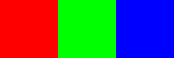

In [30]:
# Um pixel pode ser criado utilizando a função RGB passando como parâmetro os valores de R, G e B, variando de 0 até 1.
# Criamos então um array 1x3 com 3 pixels.
rgb_image_test = [RGB(1.0, 0.0, 0.0) RGB(0.0, 1.0, 0.0) RGB(0.0, 0.0, 1.0)]

Podemos extrair então os dados dessa imagem utilizando a função *channelview* da biblioteca Image do Julia. Esta função retorna um array com "canais" representando as cores RGB da imagem: o canal de vermelho, o canal de azul e o canal de verde. Ou seja, com isto, dada uma imagem qualquer, podemos extrair os dados *RGB* da imagem.

In [31]:
# A função channelview aceita como parâmetro um array de tamanho qualquer formado por pixels RGB.
img_CHW = channelview(rgb_image_test)

3×1×3 reinterpret(reshape, Float64, ::Array{RGB{Float64},2}) with eltype Float64:
[:, :, 1] =
 1.0
 0.0
 0.0

[:, :, 2] =
 0.0
 1.0
 0.0

[:, :, 3] =
 0.0
 0.0
 1.0

Como podemos observar, a função *channelview* nos retorna um conjunto de matrizes $3$ x $1$ contendo valores de Red, Green ou Blue variando de $0$ até $1$. Na primeira coluna, temos que

$$ 1.0 - Red \\ 0.0 - Green \\ 0.0 - Blue $$

, simbolizando o primeiro pixel, que é vermelho.
Em seguida, 


$$ 0.0 - Red \\ 1.0 - Green \\ 0.0 - Blue $$

, simbolizando o segundo pixel, que é verde.
Por fim, temos

$$ 0.0 - Red \\ 0.0 - Green \\ 1.0 - Blue $$

, simbolizando o terceiro pixel, que é azul.
Formando assim os 3 pixels que geramos inicialmente.


Podemos também analisar a distribuição das cores em um gráfico. Para isso, utilizaremos um dos eixos para simbolizar a quantidade de vermelho, outro para simbolizar a quantidade de verde e o último para simbolizar a quantidade de azul.
Vamos também pintar cada pixel com sua respectiva cor para ajudar na visualização.
Utilizaremos a função *scatter* da biblioteca *Plots* do Julia para gerar o gráfico.

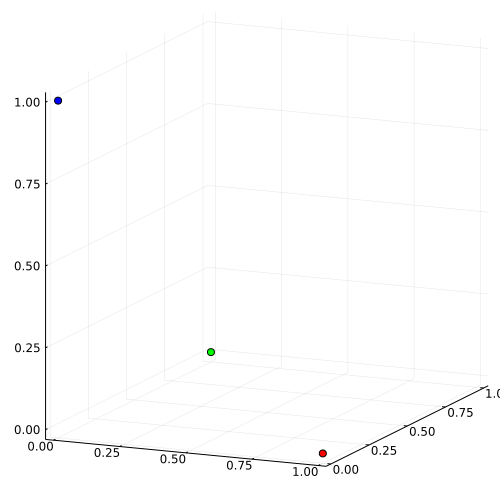

In [90]:
# Atribuiremos os valores dos eixos x,y e z do gráfico a cada um dos canais de cores RGB.
x=img_CHW[1,:,:,]
y=img_CHW[2,:,:,]
z=img_CHW[3,:,:,]

# Para ajudar na visualização, vamos pintar cada um dos pixels com sua respectiva cor.
colors = fill(RGB(0.0,0.0,0.0),3)
colors[1] = RGB(img_CHW[:,:,1][1], img_CHW[:,:,1][2], img_CHW[:,:,1][3])
colors[2] = RGB(img_CHW[:,:,2][1], img_CHW[:,:,2][2], img_CHW[:,:,2][3])
colors[3] = RGB(img_CHW[:,:,3][1], img_CHW[:,:,3][2], img_CHW[:,:,3][3])

# Chamaremos então a função scatter da biblioteca Plots.
Plots.scatter(x,y,z,size=(500,500), legend=false, color = colors')

No gráfico acima, temos o resultado esperado. Cada uma das cores está no valor $1$ de seu eixo, pois foram separados pelos canais do RGB. Como as cores descritas são equivalentes ao RGB, o gráfico ficou bem dividido.

Podemos tentar agora a primeira clusterização utilizando o algoritmo K-Means. Vamos clusterizar essa imagem simples de 3 pixels em 3 clusters diferentes. Como teremos exatamente 3 clusters, o resultado esperando é que o gráfico seja o mesmo após a clusterização. A função que chamaremos, da biblioteca *Clustering* do Julia, é kmeans(). Essa função aceita como parâmetro um conjunto de dados e um valor $K$ definindo em quantos clusters será dividido. Usaremos também o parâmetro maxiter, que é a quantidade máxima de iterações realizadas pelo algoritmo caso não haja convergência.

In [48]:
#K-Means no RGB Básico
k_means_base_matrice = hcat(colors)
R1 = kmeans(k_means_base_matrice, 3; maxiter=200, display=:none)

KmeansResult{Matrix{Float64}, Float64, Int64}([1.0 0.0 0.0; 0.0 1.0 0.0; 0.0 0.0 1.0], [1, 2, 3], [0.0, 0.0, 0.0], [1, 1, 1], [1, 1, 1], 0.0, 0, true)

Aplicado o algoritmo, vamos capturar os valores de cada cluster.

In [49]:
#Extraindo resultado do K-Means para Array novamente
means_assignments = assignments(R1) # Índice à qual cluster uma cor pertence
means_count = counts(R1) # Tamanho dos clusters
means_centers = R1.centers # Valores centrais dos clusters

3×3 Matrix{Float64}:
 1.0  0.0  0.0
 0.0  1.0  0.0
 0.0  0.0  1.0

Com isto, podemos colorir novamente nosso canal de cores da imagem de 3 pixels. Mas, ao invés de utilizar as cores originais, iremos utilizar a cor central dos nossos clusters.

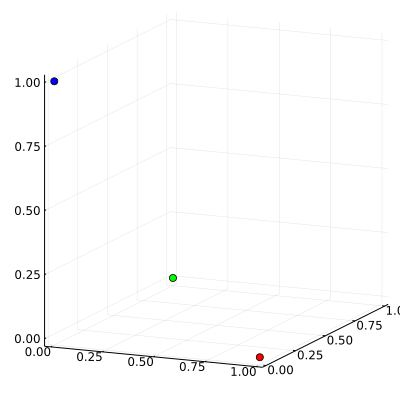

In [91]:
# Criamos um novo canal de RGB e iremos atribuir manualmente as novas cores.
colors = fill(RGB(0.0,0.0,0.0),3)
colors[1] = RGB(means_centers[:,1][1], means_centers[:,1][2], means_centers[:,1][3])
colors[2] = RGB(means_centers[:,2][1], means_centers[:,2][2], means_centers[:,2][3])
colors[3] = RGB(means_centers[:,3][1], means_centers[:,3][2], means_centers[:,3][3])

Plots.scatter(x,y,z,size=(400,400), color=colors', legend=false)

Como esperado, obtemos exatamente o mesmo gráfico. Para fixarmos a ideia antes de sua aplicação em uma imagem, vamos utilizar agora um conjunto aleatório de cores. Para isso, vamos gerar estas cores em uma matriz $5x5$.

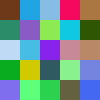

In [71]:
# Cria uma matriz de cores 5x5
random_rgb_image_test = fill(RGB(0.0,0.0,0.0),5,5)

# Realizar um loop para pintar com alguma cor gerada aleatoriamente
for i in 1:5
    for j in 1:5
        random = rand(1,3)

        red = random[1]
        green = random[2]
        blue = random[3]

        random_rgb_image_test[i,j] = RGB(red,green,blue)
    end
end
random_rgb_image_test

Com isto, vamos realizar os mesmos procedimentos, mas agora com um conjunto maior de cores. Dessa vez, vamos utilizar uma função da biblioteca Colors, chamada channelview(), que já nos dará os canais de cores RGB.

In [ ]:
random_img_CHW = channelview(random_rgb_image_test)

Com isto, igual fizemos na imagem de 3 pixels, vamos realizar a distribuição de cores em um gráfico para nos ajudar a visualizar.

In [74]:
# Criação das estruturas de dados dos canais de cores.
dataset_random_colors_red_values = fill(0.0, 5*5)
dataset_random_colors_green_values = fill(0.0, 5*5)
dataset_random_colors_blue_values = fill(0.0, 5*5)
dataset_colors_random = fill(RGB(0.0,0.0,0.0), 5*5)

# Itera em toda a matriz armazenando os valores dos canais RGB.
for i in 1:5
    for j in 1:5
        dataset_random_colors_red_values[((i-1)*5) + j] = random_img_CHW[1,:,:][j,i]
        dataset_random_colors_green_values[((i-1)*5) + j] = random_img_CHW[2,:,:][j,i]
        dataset_random_colors_blue_values[((i-1)*5) + j] = random_img_CHW[3,:,:][j,i]

        dataset_colors_random[((i-1)*5) + j] = RGB(
            random_img_CHW[:,j,i][1],
            random_img_CHW[:,j,i][2],
            random_img_CHW[:,j,i][3]
        )
    end
end

Com isto, podemos novamente representar a distribuição das cores.

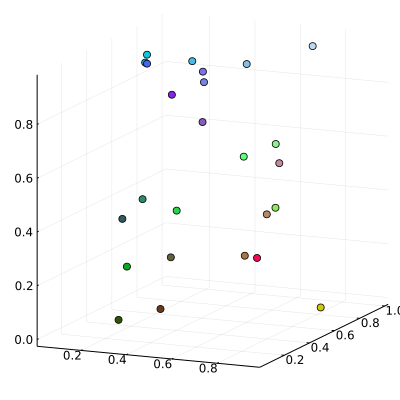

In [93]:
Plots.scatter(  dataset_random_colors_red_values,
                dataset_random_colors_green_values,
                dataset_random_colors_blue_values,
                size=(400,400), legend=false, color = dataset_colors_random
            )

Vamos então realizar novamente o processo de clusterização utilizando o algoritmo K-Means. Faremos novamente utilizando 3 clusters, mas este número K é arbitrário.

In [ ]:
#K-Means no RGB Random
k_means_base_matrice_random = hcat(dataset_colors_random')
R2 = kmeans(k_means_base_matrice_random, 3; maxiter=200, display=:none)

In [ ]:
#Extraindo resultado do K-Means para Array novamente
means_random_assignments = assignments(R2) # Índice à qual cluster uma cor pertence
means_random_count = counts(R2) # Tamanho dos clusters
means_random_centers = R2.centers # Valores centrais dos clusters

In [117]:
for i in 1:5
    for j in 1:5
    
        assignment_index = means_random_assignments[((i-1)*5)+j]
    
        new_red_value = means_random_centers[:, assignment_index]'[1]
        new_green_value = means_random_centers[:, assignment_index]'[2]
        new_blue_value = means_random_centers[:, assignment_index]'[3]
    
        new_color = RGB(new_red_value, new_green_value, new_blue_value)
        dataset_colors_random[((i-1)*5)+j] = new_color
    end
end

Com isto, pintaremos as antigas com as cores dos clusters ao qual pertencem após o K-Means.

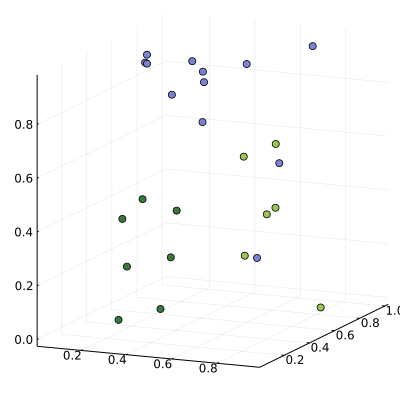

In [118]:
Plots.scatter(dataset_random_colors_red_values,
    dataset_random_colors_green_values,
    dataset_random_colors_blue_values,
    size=(400, 400), legend=false, color=dataset_colors_random
)

Com isto, percebemos que, para aplicar este procedimento para qualquer dado, temos 3 passos principais:

* 1: Carregar nossos dados de acordo com os canais de cores RGB
* 2: Aplicar o algoritmo do K-Means com um número K de clusters
* 3: Recolorir a entrada

Vamos generalizar estes passos em funções específicas e checar seu comportamento em uma imagem. 

As funções a seguir apenas generalizam os passos que já realizamos para uma entrada $NxN$ qualquer. Se desejar, não é necessário ler este código para entendimento dos procedimentos posteriores.

In [124]:
# Função que, dado um entrada do tipo channel da biblioteca Colors e os tamanhos verticais e horizontais do dado, devolve a distribuição de cores em canais RGB.
# Entrada: channelview, size_v (tamanho vertical) e size_h (tamanho horizontal).
# Saída: Vetor de cores vermelho, vetor de cores verde, vetor de cores azul e vetor com todas as cores.
function GetColors(channel_view, size_v, size_h)

    # Cria cada um dos canais do RGB.
    red_values = fill(0.0, size_v * size_h)
    green_values = fill(0.0, size_v * size_h)
    blue_values = fill(0.0, size_v * size_h)

    colors = fill(RGB(0.0, 0.0, 0.0), size_v * size_h)

    # Itera a partir do tamanho da entrada preenchendo os canais e o vetor de cores.
    for i in 1:size_v
        for j in 1:size_h
            red_values[((i-1)*size_h)+j] = channel_view[1, j, i]
            green_values[((i-1)*size_h)+j] = channel_view[2, j, i]
            blue_values[((i-1)*size_h)+j] = channel_view[3, j, i]

            colors[((i-1)*size_h)+j] = RGB(
                channel_view[:, j, i][1],
                channel_view[:, j, i][2],
                channel_view[:, j, i][3]
            )
        end
    end

    return red_values, green_values, blue_values, colors
end

# Função que, dado um vetor de cores e um número K de clusters, devolve as saídas do algoritmo K-Means.
# Entrada: Vetor de cores, K natural.
# Saída: Vetor com os índices, tamanho dos clusters e vetor com os valores centrais dos clusters.
function ClusterizeImage(colors, k)
    # Extrai a informação do array de cores e aplica o K-Means
    k_means_base_matrice_img = hcat(colors)
    R_image = kmeans(k_means_base_matrice_img, k; maxiter=200, display=:none)

    #Extraindo resultado do K-Means para Array novamente
    means_img_assignments = assignments(R_image) # Índice à qual cluster uma cor pertence
    means_img_count = counts(R_image) # Tamanho dos clusters
    means_img_centers = R_image.centers # Valores centrais dos clusters

    return means_img_assignments, means_img_count, means_img_centers
end

# Função que, dado o caminho de uma imagem e um valor K de clusters, retorna a imagem recolorida apenas com as K cores centrais.
# Entrada: caminho da imagem (ex: "imagem.jpg"), K natural.
# Saída: channelview da imagem recolorida, vetor com as novas cores, channelview da imagem original, cores da imagem original.
function ClusterizeAndPaintImage(img_path, k)

    # Carrega as informações da foto
    loaded_img = load(img_path)
    img_CHW = channelview(loaded_img)
    _, v, u = size(img_CHW)

    # Recebe os canais de cores 
    img_red_values, img_green_values, img_blue_values, original_colors = GetColors(img_CHW, u, v)
    new_img_CHW = copy(img_CHW)
    new_colors = copy(original_colors)

    # Aplica a clusterização e captura as informações retornadas
    means_img_assignments, means_img_count, means_img_centers = ClusterizeImage(original_colors, k)

    for i in 1:u
        for j in 1:v

            assignment_index = means_img_assignments[((i-1)*v)+j]

            new_red_value = means_img_centers[:, assignment_index]'[1]
            new_green_value = means_img_centers[:, assignment_index]'[2]
            new_blue_value = means_img_centers[:, assignment_index]'[3]

            new_img_CHW[1, j, i] = new_red_value
            new_img_CHW[2, j, i] = new_green_value
            new_img_CHW[3, j, i] = new_blue_value

            new_color = RGB(new_red_value, new_green_value, new_blue_value)

            new_colors[((i-1)*v)+j] = new_color
        end
    end

    return new_img_CHW, new_colors, img_CHW, original_colors
end

ClusterizeAndPaintImage (generic function with 2 methods)

Com isto, temos agora todas as ferramentas para realizar o processo nas imagens.

Vamos carregar uma imagem de exemplo em que seja fácil visualizar a distribuição de cores.

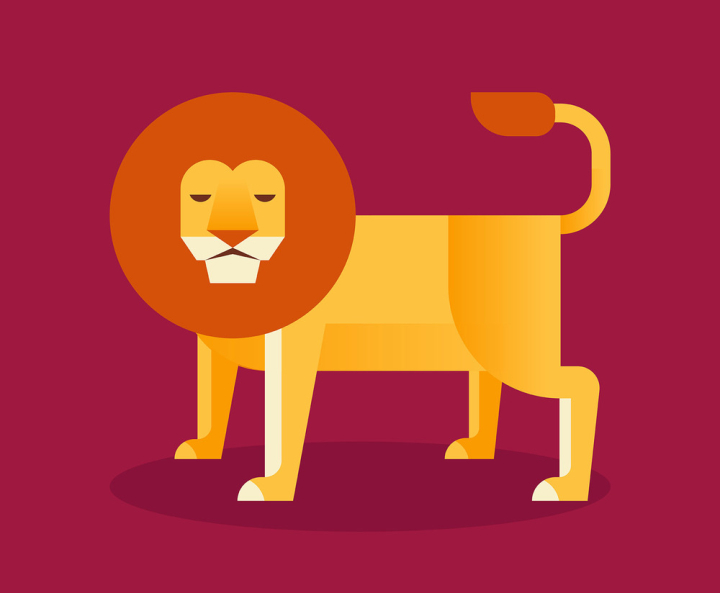

In [122]:
img_path = "dataset_images/lion.jpg"
loaded_img = load(img_path)

Como a imagem é simples e possui, aparentemente, 3 cores predominantes (vermelho, laranja e amarelo), podemos prever qual será o comportamento a depender do valor $K$ aplicado ao K-Means.

* K = 1: Irá predominar a cor vermelha. Com isso, ficará apenas uma imagem vermelha
* K = 2: Irá predominar o vermelho e ou amarelo ou laranja. Com isso, teremos o fundo e o leão formado por apenas uma cor.
* K = 3: Irá predominar o vermelho, um laranja e um amarelo. Com isso, teremos o fundo vermelho e o leão composto por apenas 1 tom de laranja e 1 tom de amarelo.

Vamos rodar o função ClusterizeAndPaintImage() para os três casos e observar seu comportamento.

,,,,,,

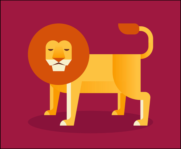
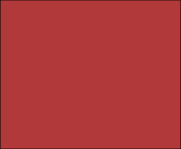
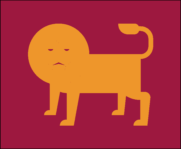
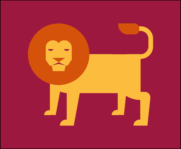
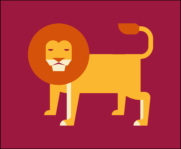
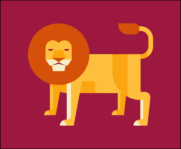
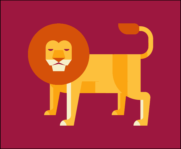

In [135]:
img_path = "dataset_images/lion.jpg"
loaded_img = load(img_path)

new_img_CHW, new_colors, img_CHW, original_colors = ClusterizeAndPaintImage("dataset_images/lion.jpg", 1)
img_1_color = colorview(RGB, new_img_CHW)

new_img_CHW, new_colors, img_CHW, original_colors = ClusterizeAndPaintImage("dataset_images/lion.jpg", 2)
img_2_color = colorview(RGB, new_img_CHW)

new_img_CHW, new_colors, img_CHW, original_colors = ClusterizeAndPaintImage("dataset_images/lion.jpg", 3)
img_3_color = colorview(RGB, new_img_CHW)

new_img_CHW, new_colors, img_CHW, original_colors = ClusterizeAndPaintImage("dataset_images/lion.jpg", 4)
img_4_color = colorview(RGB, new_img_CHW)

new_img_CHW, new_colors, img_CHW, original_colors = ClusterizeAndPaintImage("dataset_images/lion.jpg", 5)
img_5_color = colorview(RGB, new_img_CHW)

new_img_CHW, new_colors, img_CHW, original_colors = ClusterizeAndPaintImage("dataset_images/lion.jpg", 6)
img_6_color = colorview(RGB, new_img_CHW)

[loaded_img, img_1_color, img_2_color, img_3_color, img_4_color, img_5_color, img_6_color]

Com isto, conseguimos nosso objetivo inicial, que era segmentar as cores de uma imagem baseada nas suas cores centrais. Não só isso, como conseguimos que a escolha da quantidade de cores centrais seja escolhida pelo usuário, e podemos aplicar isto a qualquer foto com apenas a chamada de uma única função.

,,,,,,

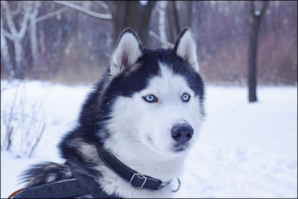
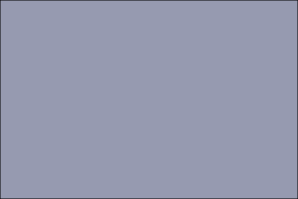
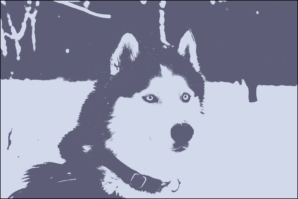
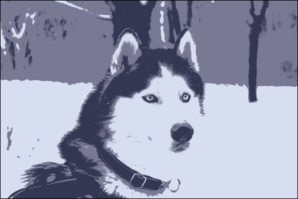
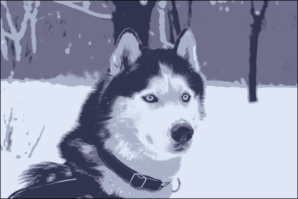
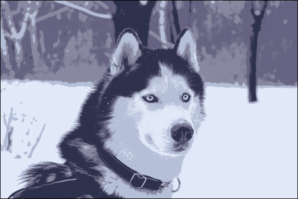
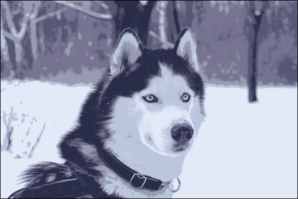

In [136]:
img_path = "dataset_images/husky.jpg"
loaded_img = load(img_path)

new_img_CHW, new_colors, img_CHW, original_colors = ClusterizeAndPaintImage("dataset_images/husky.jpg", 1)
img_1_color = colorview(RGB, new_img_CHW)

new_img_CHW, new_colors, img_CHW, original_colors = ClusterizeAndPaintImage("dataset_images/husky.jpg", 2)
img_2_color = colorview(RGB, new_img_CHW)

new_img_CHW, new_colors, img_CHW, original_colors = ClusterizeAndPaintImage("dataset_images/husky.jpg", 3)
img_3_color = colorview(RGB, new_img_CHW)

new_img_CHW, new_colors, img_CHW, original_colors = ClusterizeAndPaintImage("dataset_images/husky.jpg", 4)
img_4_color = colorview(RGB, new_img_CHW)

new_img_CHW, new_colors, img_CHW, original_colors = ClusterizeAndPaintImage("dataset_images/husky.jpg", 5)
img_5_color = colorview(RGB, new_img_CHW)

new_img_CHW, new_colors, img_CHW, original_colors = ClusterizeAndPaintImage("dataset_images/husky.jpg", 6)
img_6_color = colorview(RGB, new_img_CHW)

[loaded_img, img_1_color, img_2_color, img_3_color, img_4_color, img_5_color, img_6_color]

,,,,,,

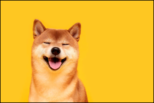
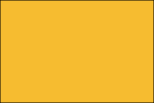
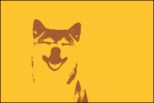
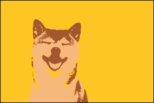
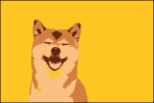
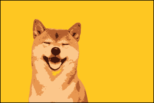
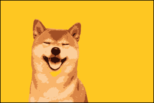

In [137]:
img_path = "dataset_images/shiba1.jpg"
loaded_img = load(img_path)

new_img_CHW, new_colors, img_CHW, original_colors = ClusterizeAndPaintImage("dataset_images/shiba1.jpg", 1)
img_1_color = colorview(RGB, new_img_CHW)

new_img_CHW, new_colors, img_CHW, original_colors = ClusterizeAndPaintImage("dataset_images/shiba1.jpg", 2)
img_2_color = colorview(RGB, new_img_CHW)

new_img_CHW, new_colors, img_CHW, original_colors = ClusterizeAndPaintImage("dataset_images/shiba1.jpg", 3)
img_3_color = colorview(RGB, new_img_CHW)

new_img_CHW, new_colors, img_CHW, original_colors = ClusterizeAndPaintImage("dataset_images/shiba1.jpg", 4)
img_4_color = colorview(RGB, new_img_CHW)

new_img_CHW, new_colors, img_CHW, original_colors = ClusterizeAndPaintImage("dataset_images/shiba1.jpg", 5)
img_5_color = colorview(RGB, new_img_CHW)

new_img_CHW, new_colors, img_CHW, original_colors = ClusterizeAndPaintImage("dataset_images/shiba1.jpg", 6)
img_6_color = colorview(RGB, new_img_CHW)

[loaded_img, img_1_color, img_2_color, img_3_color, img_4_color, img_5_color, img_6_color]

,,,,,,

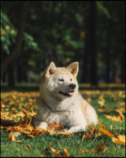
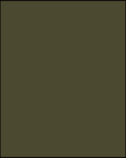
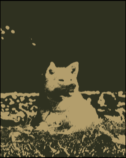
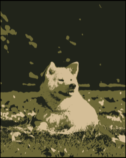
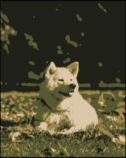
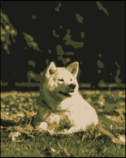
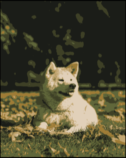

In [138]:
img_path = "dataset_images/akita.jpg"
loaded_img = load(img_path)

new_img_CHW, new_colors, img_CHW, original_colors = ClusterizeAndPaintImage("dataset_images/akita.jpg", 1)
img_1_color = colorview(RGB, new_img_CHW)

new_img_CHW, new_colors, img_CHW, original_colors = ClusterizeAndPaintImage("dataset_images/akita.jpg", 2)
img_2_color = colorview(RGB, new_img_CHW)

new_img_CHW, new_colors, img_CHW, original_colors = ClusterizeAndPaintImage("dataset_images/akita.jpg", 3)
img_3_color = colorview(RGB, new_img_CHW)

new_img_CHW, new_colors, img_CHW, original_colors = ClusterizeAndPaintImage("dataset_images/akita.jpg", 4)
img_4_color = colorview(RGB, new_img_CHW)

new_img_CHW, new_colors, img_CHW, original_colors = ClusterizeAndPaintImage("dataset_images/akita.jpg", 5)
img_5_color = colorview(RGB, new_img_CHW)

new_img_CHW, new_colors, img_CHW, original_colors = ClusterizeAndPaintImage("dataset_images/akita.jpg", 6)
img_6_color = colorview(RGB, new_img_CHW)

[loaded_img, img_1_color, img_2_color, img_3_color, img_4_color, img_5_color, img_6_color]

# Bibliografia

https://www.kdnuggets.com/2019/08/introduction-image-segmentation-k-means-clustering.html

https://towardsdatascience.com/image-processing-with-python-unsupervised-learning-for-image-segmentation-90ebd23d91a4

https://juliaimages.org/ImageCore.jl/v0.0.4/views.html

https://juliastats.org/Clustering.jl/dev/kmeans.html

https://www.kdnuggets.com/2019/08/introduction-image-segmentation-k-means-clustering.html

https://docs.juliaplots.org/stable/

https://en.wikipedia.org/wiki/Image_file_format

https://pt.wikipedia.org/wiki/Pixel

https://en.wikipedia.org/wiki/HSL_and_HSV

https://freecontent.manning.com/why-should-you-program-with-julia/

https://docs.juliahub.com/ClusterAnalysis/FfFK8/0.1.0/algorithms/kmeans.html
